# Notebook to debug Dyn_ACD_wtemp.py

The notebook to debug the Dyn_ACD algorithm. 

The algorithm in Dyn_ACD_wtemp_0T.py

The latent variables at T=0 are drived separately from those at T>0.  

In this version of the algorithm, all the latent variables are static, exept w and ell, i.e., w(t), ell(t). 

In this version, the compuations for the initial time step is separated from other time steps. 

The dataset is divided to data0 and data_b1mAtm1At, which is equivalent to \hat{A}(t) in Dynamic_CRep. 
    

Synthetic data are store in the path: '../data/input/synthetic/'

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
import os
print(os.getcwd())

/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn


In [4]:
import sys
sys.path.append('../')
sys.path.append('../Dyn_ACD')
# os.chdir("..")

import numpy as np
import pandas as pd

from Dyn_ACD.Dyn_ACD_wtemp_0T import calculate_lambda_full
import matplotlib.pyplot as plt
import networkx as nx
import importlib
import sktensor as skt
from sklearn import metrics
%matplotlib notebook
%matplotlib inline

In [5]:
import Dyn_ACD as Dyn_ACD

In [6]:
import os
print(os.getcwd())

/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn


In [7]:
cmap = 'PuBuGn'

In [8]:
def flt(x,d=3):
    return round(x, d)

In [98]:
label = '200_2_8.0_20_0.2_2_2_0.8_6'
# label = '100_2_5.0_5_0.2_2_2_0.2_0'

In [99]:
in_dir = '../data/input/synthetic/200_20/'

In [100]:
theta = np.load(in_dir+'theta_'+label+'.npz',allow_pickle=True)

In [101]:
theta['z'].shape

(200, 200)

In [102]:
importlib.reload(Dyn_ACD.tools_temp)

<module 'Dyn_ACD.tools_temp' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/tools_temp.py'>

In [103]:
network = in_dir+'syn_'+label+'.csv'
# network = '../data/input/'+label+'.dat'

A, B, B_T, data_T_vals = Dyn_ACD.tools_temp.import_data(network,header=0, ego='source', alter='target', undirected=False, binary=False,sep=',')
nodes = A[0].nodes()
N = len(nodes)
K = int(str(label).split('_')[1])
T = int(str(label).split('_')[3])
print(N,K,T)


   source  target  weight_t0  weight_t1  weight_t2  weight_t3  weight_t4  \
0       0       4          0          0          1          1          1   
1       0      16          1          1          1          1          1   
2       0      17          1          1          1          1          1   
3       0      22          0          0          0          0          0   
4       0      24          0          0          0          0          0   

   weight_t5  weight_t6  weight_t7  ...  weight_t11  weight_t12  weight_t13  \
0          0          0          0  ...           0           0           0   
1          1          1          1  ...           0           0           0   
2          1          1          1  ...           0           0           0   
3          0          0          0  ...           0           0           0   
4          0          0          0  ...           0           0           0   

   weight_t14  weight_t15  weight_t16  weight_t17  weight_t18  weigh

In [104]:
(B[0]>0).sum()

959

### Initializing near ground truth

In [105]:
Dyn_ACD.time_glob.timer.verbose = False
Dyn_ACD.time_glob.timer.color = 'green'
Dyn_ACD.time_glob.timer.print_details = False
Dyn_ACD.time_glob.timer.print_sub = True
Dyn_ACD.time_glob.printer.verboseness = False
Dyn_ACD.time_glob.parallelize = False

In [106]:
# importlib.reload(Dyn_ACD_static.cv_functions)  
importlib.reload(Dyn_ACD.time_glob)
importlib.reload(Dyn_ACD.tools_temp) 
importlib.reload(Dyn_ACD.Dyn_ACD_wtemp)

<module 'Dyn_ACD.Dyn_ACD_wtemp' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/Dyn_ACD_wtemp.py'>

In [158]:
T = B.shape[0]-1 
# T = 2
B_train = B[:T]
B_aggr = B_train.sum(axis=0)[np.newaxis,:,:]
# B_train[B_train>1] = 1 
T_f = T-1
print(B_train.shape, B.shape, T_f, T)

(20, 200, 200) (21, 200, 200) 19 20


In [327]:
flag_anomaly = True 
rseed = 5
initialization = 3

In [328]:
importlib.reload(Dyn_ACD.Dyn_ACD_wtemp)

<module 'Dyn_ACD.Dyn_ACD_wtemp' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/Dyn_ACD_wtemp.py'>

T: 19
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/200_20/theta_200_2_8.0_20_0.2_2_2_0.8_6.npz
Updating realization 0 ... 
done!
Nreal = 0 - Loglikelihood = [-37311.63666255] - iterations = 1000 - time = 406.56 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/200_20/theta_200_2_8.0_20_0.2_2_2_0.8_6.npz
Updating realization 1 ... 
done!
Nreal = 1 - Loglikelihood = [-37318.73419867] - iterations = 811 - time = 337.78 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/200_20/theta_200_2_8.0_20_0.2_2_2_0.8_6.npz
Updating realization 2 ... 
done!
Nreal = 2 - Loglikelihood = [-37391.57345066] - iterations = 1000 - time = 419.35 seconds
u, and v are initialized randomly; w is initialized using the input files:
../data/input/synthetic/200_20/theta_200_2_8.0_20_0.2_2_2_0.8_6.npz
Updating realization 3 ... 
done!
Nreal = 3 - Logli

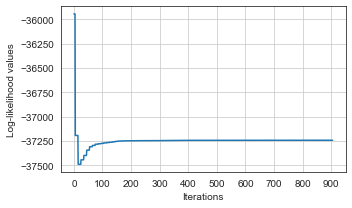


Inferred parameters saved in: ../data/output/theta_200_2_8.0_20_0.2_2_2_0.8_6_True.npz
To load: theta=np.load(filename), then e.g. theta["u"]
CPU times: user 48min 9s, sys: 12min 12s, total: 1h 21s
Wall time: 1h 25s


In [337]:
%%time
importlib.reload(Dyn_ACD.Dyn_ACD_wtemp)
rng = np.random.RandomState(rseed)
if initialization >= 4: 
    beta0  = theta['beta']
    phi0   = theta['phi']
    mupr0  = theta['mu']
    pibr0  = theta['pi']
    ell0   = theta['ell']    
else:  
    beta0  = rng.random_sample(1) 
    phi0   = rng.random_sample(1)
    mupr0  = rng.random_sample(1)
    pibr0  = rng.random_sample(1)
    ell0   = rng.random_sample(1) 
# pibr0  = rng.random_sample(1)
# '../data/output/theta_100_2_5.0_5_0.2_2_2_0.8_7_False'
in_parameters = in_dir+'theta_'+label

model = Dyn_ACD.Dyn_ACD_wtemp.Dyn_ACD_wtemp(K = K,N = N, plot_loglik=True,verbose =2,N_real= 10,
                         undirected=False,flag_anomaly = flag_anomaly,max_iter = 1000,
                         fix_mupr=False,fix_pibr = False,fix_phi = False,
                         beta0 = beta0, phi0 = phi0, mupr0=mupr0, pibr0=pibr0,ell0=ell0,
                         fix_beta=False,fix_ell=False,fix_communities=False,fix_w= True, 
                         initialization=initialization, out_inference = True,
                         in_parameters= in_parameters, 
                         end_file = label+'_' + str(flag_anomaly),constrained=False, ag=1.0,bg=1.,L=T_f)

        
u, v, w, u0, v0, w0, beta, phi, ell, pi, mu,Loglikelihood = model.fit(data=B_train,T=T_f, nodes=nodes)

In [338]:
print(f"{pi}, {theta['pi']}")
print(f"{mu}, {theta['mu']}")

0.16949147610954643, 0.2
0.11140277144441409, 0.08871003925430342


In [339]:
w0

array([[0.01743076, 0.01758032]])

In [340]:
theta['w']

array([[0.01740969, 0.00174097],
       [0.00174097, 0.01740969]])

In [341]:
w

array([[0.01749757, 0.01752586],
       [0.01749745, 0.01747688],
       [0.01753313, 0.01747692],
       [0.01757551, 0.01748581],
       [0.01741885, 0.01749551],
       [0.01746675, 0.01752359],
       [0.01752875, 0.01751019],
       [0.01749854, 0.01741116],
       [0.01752039, 0.01747646],
       [0.01752096, 0.01749054],
       [0.01741891, 0.017527  ],
       [0.01753644, 0.01755361],
       [0.01748814, 0.01748112],
       [0.0175359 , 0.01757221],
       [0.01743247, 0.01750542],
       [0.01741082, 0.01742119],
       [0.01741629, 0.01754577],
       [0.0174967 , 0.01744831],
       [0.01752987, 0.01742693]])

In [342]:
u, cs_u = Dyn_ACD.cv_functions.cosine_similarity(u,theta['u'])
v, cs_v = Dyn_ACD.cv_functions.cosine_similarity(v,theta['v'])
cs_u,cs_v

(0.8403822468919806, 0.8483154048429015)

In [343]:
_, cs_u0 = Dyn_ACD.cv_functions.cosine_similarity(u0,theta['u'])
_, cs_v0 = Dyn_ACD.cv_functions.cosine_similarity(v0,theta['v'])
cs_u0,cs_v0

(0.28750208990536263, 0.29174450729257445)

### Eta and beta

In [344]:
print('\nInitial beta: {}'.format(theta['beta']),'Inferred beta: {}'.format(beta))
print('\nInitial phi: {}' .format(theta['phi']), 'Inferred phi: {}' .format(phi))
print('\nInitial ell: {}' .format(theta['ell']), 'Inferred ell: {}' .format(ell))
# print('\nInitial pi:  {}' .format(pibr),'Inferred pi: {}'  .format(pi))

# print('\nInitial mu: {}' .format(mupr0),'Inferred mu: {}'.format(mu))

print(theta['beta'],theta['pi'],theta['phi'],theta['ell'])


Initial beta: 0.2 Inferred beta: [0.26391463]

Initial phi: 0.2 Inferred phi: 0.18901218727178037

Initial ell: 0.2 Inferred ell: 0.14128538522282935
0.2 0.2 0.2 0.2


In [299]:
importlib.reload(Dyn_ACD.cv_functions)
importlib.reload(Dyn_ACD.tools)

<module 'Dyn_ACD.tools' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/tools.py'>

### AUC 

In [300]:
subs_nzp =  B[T_f].nonzero()
lambda_ij = calculate_lambda_full(u,v,w)

In [301]:
M0  = Dyn_ACD.cv_functions._lambda0_full(u,v,w)  
M00 = Dyn_ACD.cv_functions._lambda0_full(u0,v0,w0)  
print(M00.shape, M0.shape)

(1, 200, 200) (19, 200, 200)


In [302]:
Z = theta['z'] 
if Z.ndim > 2:
    Z_train = Z[:T]
    Z_aggr  = Z_train.sum(axis=0)[np.newaxis,:,:]
else:
    Z_train = np.copy(Z)
    Z_aggr = np.copy(Z)

In [303]:
T_f, Z_train.shape, Z.shape

(19, (200, 200), (200, 200))

In [304]:
importlib.reload(Dyn_ACD.cv_functions)
importlib.reload(Dyn_ACD.tools)

<module 'Dyn_ACD.tools' from '/Users/hsafdari/Documents/Dr_Caterina_de_Bacco/anomaly_detection/Dynamic_ACD/notebooks_syn/../Dyn_ACD/tools.py'>

In [305]:
if flag_anomaly:
    QIJ_dense = Dyn_ACD.cv_functions.QIJ_dense(B_train,B[0],M0, M00, T_f, beta, phi, ell,pi, mu)
    print(QIJ_dense.shape)

In [306]:
# mask_B1 = np.zeros(B[0].shape[0])
# mask_B1[B[0] > 0] = 1 
# mask_B0 = np.ones(B[0].shape)
# mask_B0[B[0] > 0] = 0

mask_B1 = B[0] > 0
for t in np.arange(1,B.shape[0]):
    mask_B1 = np.logical_or(mask_B1, B[t]>0)

mask_B0 = np.logical_not(mask_B1)    

In [307]:
if flag_anomaly:
    # mask_B1 = np.zeros(B[T_f].shape)
    # mask_B1[B[T_f] > 0] = 1 
    # mask_B0 = np.ones(B[T_f].shape)
    # mask_B0[B[T_f] > 0] = 0
    print('AUCZ (B==1): ', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense, Z,mask=mask_B1))
    print('AUCZ(B==0): ', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense, Z,mask=mask_B0))
    print('AUCZ (all): ', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense, Z,mask=None))


In [308]:
mask_Z = Z > 0

In [309]:
# if flag_anomaly:
#     mask_tmp = np.zeros(B[T_f].shape)
#     mask_tmp[B[T_f] > 0] = 1 
#     print('AUCZ:', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense*mask_tmp, Z[T_f]))
#     print('AUCZ:', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense*mask_tmp, Z[T_f]*mask_tmp))
#     print('AUCZ:', Dyn_ACD.cv_functions.calculate_AUC(QIJ_dense*np.logical_not(mask_tmp), Z[T_f]*np.logical_not(mask_tmp)))
#     print('AUCZ:', Dyn_ACD.cv_functions.calculate_AUC((1-QIJ_dense)*np.logical_not(mask_tmp), Z[T_f]*np.logical_not(mask_tmp)))

In [310]:
L = 3
n_rows = 2
if flag_anomaly:
    plt.figure(figsize=(12,8))
    
    plt.subplot(n_rows, L,1 )
    plt.imshow(QIJ_dense, cmap=cmap, interpolation='nearest')
    # plt.imshow(B[0], cmap=cmap, interpolation='nearest')
    plt.colorbar(fraction=0.046)
    plt.title('Q')


    plt.subplot(n_rows, L, 2) 
    plt.imshow(QIJ_dense*mask_B1, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Q x B') 
    
    plt.subplot(n_rows, L, 3) 
    plt.imshow(Z*mask_B1, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Z x B') 
    
    plt.subplot(n_rows, L, 4) 
    plt.imshow(Z, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('Z') 
    
    plt.subplot(n_rows, L, 5) 
    plt.imshow(mask_B1, cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('B') 
    
    plt.subplot(n_rows, L, 6) 
    plt.imshow(lambda_ij[-1], cmap=cmap, interpolation='nearest') #values of Q at entries of B
    plt.colorbar(fraction=0.046)
    plt.title('lambda') 

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [311]:
M = Dyn_ACD.cv_functions.calculate_conditional_expectation(M0[-1], beta=beta)

In [312]:
if T>1:
    if flag_anomaly: 
        M = Dyn_ACD.cv_functions.calculate_conditional_expectation_Q(M0[-1], QIJ_dense, beta=beta, phi=phi, ell=ell)
        M[subs_nzp] = (1-QIJ_dense)[subs_nzp] * (1 - beta) + QIJ_dense[subs_nzp] * (1 - phi)# to calculate AUC
    else:
        M = Dyn_ACD.cv_functions.calculate_conditional_expectation(M0[-1], beta=beta) 
        M[subs_nzp] = (1 - beta)# to calculate AUC
else:
    if flag_anomaly: 
        M = Dyn_ACD.cv_functions.calculate_conditional_expectation_Q(M0[-1], QIJ_dense, beta=1, phi=1, ell=float(ell)) 
    else:
        M = np.copy(M0[-1])


In [313]:
M.shape

(200, 200)

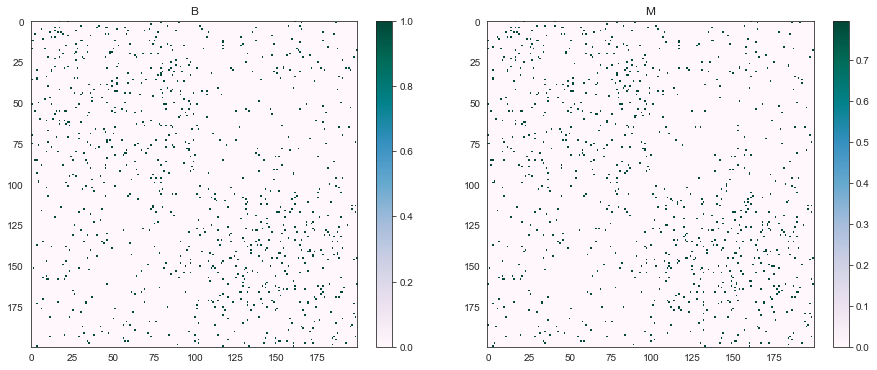

In [314]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.imshow(B[T], cmap=cmap, interpolation='nearest')
# plt.imshow(B[0], cmap=cmap, interpolation='nearest')
plt.colorbar(fraction=0.046)
plt.title('B')


plt.subplot(1, 2, 2) 
plt.imshow(M, cmap=cmap, interpolation='nearest') #values of Q at entries of B
plt.colorbar(fraction=0.046)
plt.title('M') 


plt.show()

In [315]:
Dyn_ACD.cv_functions.calculate_AUC(M, B[T]), T, T_f

(0.9100981497233671, 20, 19)

In [316]:
T

20

### Communities

In [135]:
theta['u'].shape

(200, 2)

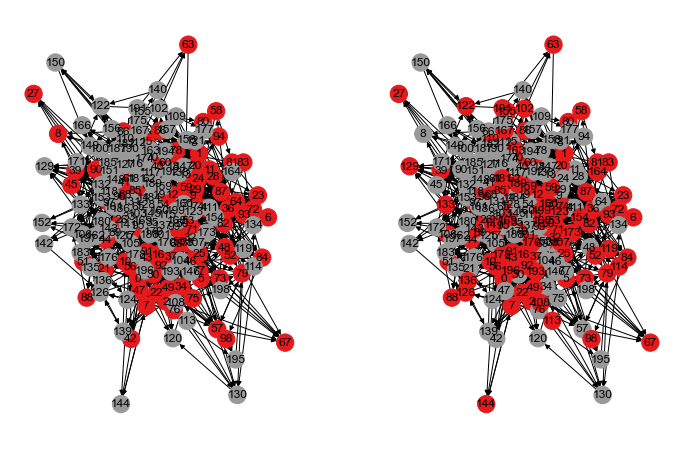

In [317]:
pos = nx.spring_layout(A[0], seed = 5) 
umax=np.argmax(theta['u'],1)#max of each u
# plt.figure(figsize=(14,10))
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
ax = axes.flatten()

nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[0])
ax[0].set_axis_off()

umax=np.argmax(u,1)#max of each u
nodelist = []
for k in range(K+1):
    nodelist.extend([i for i in range(N) if umax[i]==k])
nx.draw(A[0],pos=pos, with_labels=True,node_color = umax,cmap = plt.cm.Set1,ax=ax[1])

plt.show()

### A vs M

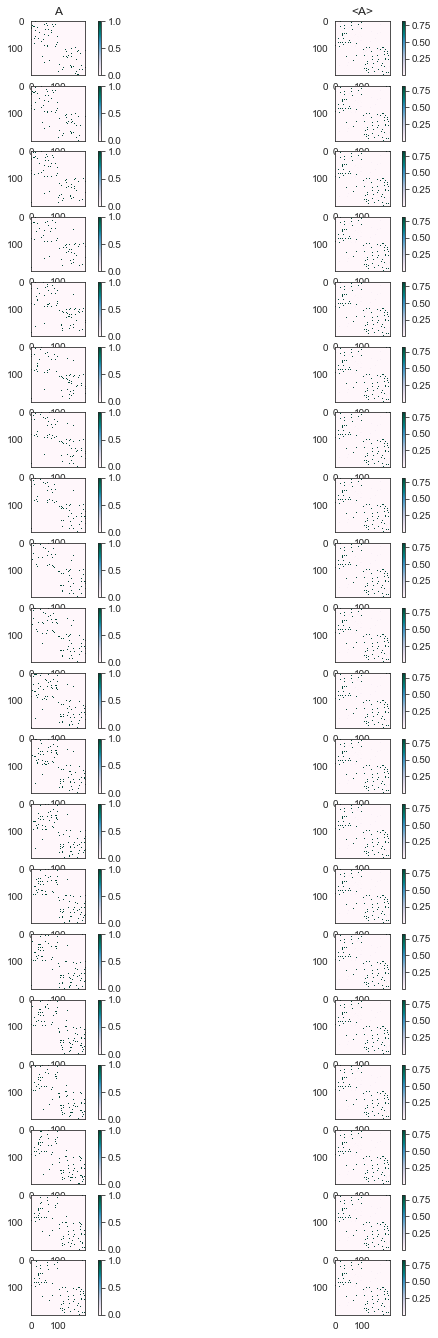

In [137]:
import matplotlib.pyplot as plt

# Adjust the spacing between subplots
plt.figure(figsize=(10, 25))
plt.subplots_adjust(hspace= 0.2)  # You can adjust the value as needed 

c = 0
for t in range(T):
    plt.subplot(T + 1, 2, c + 1)
    plt.imshow(B[t][nodelist][:, nodelist], cmap=cmap, interpolation='nearest')
    plt.colorbar(fraction=0.046)
    if c == 0:
        plt.title('A')
    plt.subplot(T + 1, 2, c + 2)
    plt.imshow(M[nodelist][:, nodelist], cmap=cmap, interpolation='nearest')
    plt.colorbar(fraction=0.046)
    if c == 0:
        plt.title('<A>')
    c += 2

plt.show()


### W

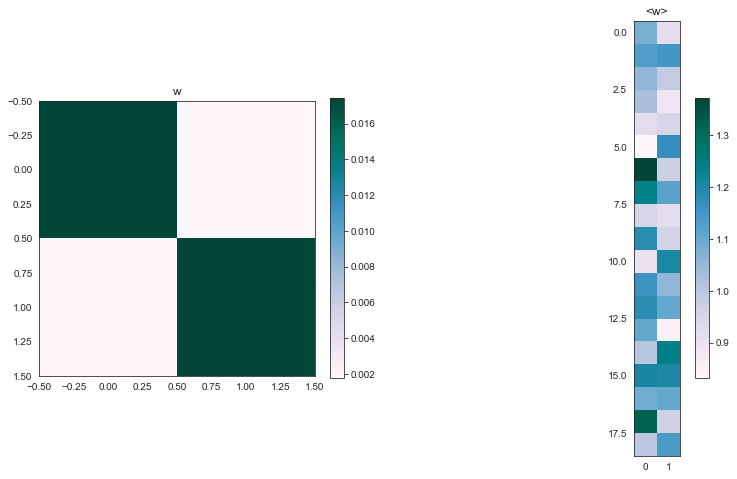

In [318]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(theta['w'], cmap=cmap, interpolation='nearest')
plt.colorbar(fraction=0.046)
plt.title('w')
plt.subplot(1, 2, 2)
plt.imshow(w, cmap=cmap, interpolation='nearest')
plt.colorbar(fraction=0.046)
plt.title('<w>')
plt.show()